<a href="https://colab.research.google.com/github/sboni2/Project/blob/main/employee_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [5]:
from google.colab import files
uploaded = files.upload()


Saving dataset.csv to dataset.csv


In [7]:
import pandas as pd

data = pd.read_csv("dataset.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [9]:
data.tail(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [10]:
data.shape

(32561, 15)

In [11]:
#null values
data.isna().sum() #mean mdeian mode arbitrary

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [12]:
print(data.workclass.value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [13]:
data.workclass.replace({'?':'Others'},inplace=True)
print(data['workclass'].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


/tmp/ipython-input-13-4184710730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Others'},inplace=True)


In [14]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


In [15]:
data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


/tmp/ipython-input-15-1148816719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


In [16]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [17]:
print(data.relationship.value_counts())

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64


In [18]:
print(data.gender.value_counts())

gender
Male      21790
Female    10771
Name: count, dtype: int64


In [19]:
data.shape

(32561, 15)

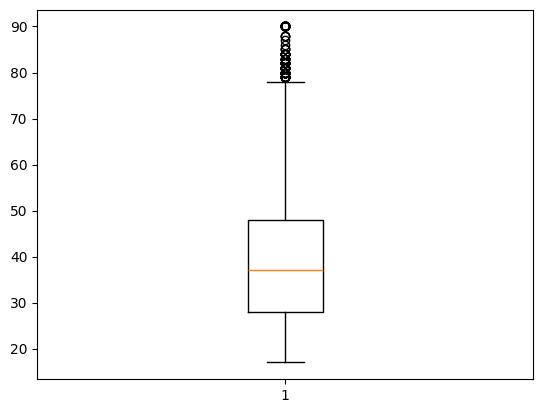

In [20]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

In [21]:
data=data[(data['age']<=75)&(data['age']>=17)]

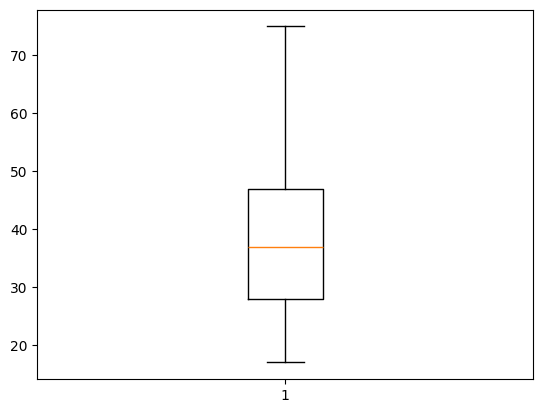

In [22]:
plt.boxplot(data['age'])
plt.show()

In [23]:
data.shape

(32320, 15)

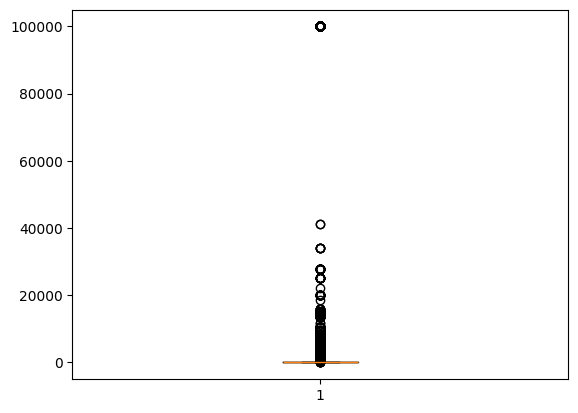

In [24]:
plt.boxplot(data['capital-gain'])
plt.show()

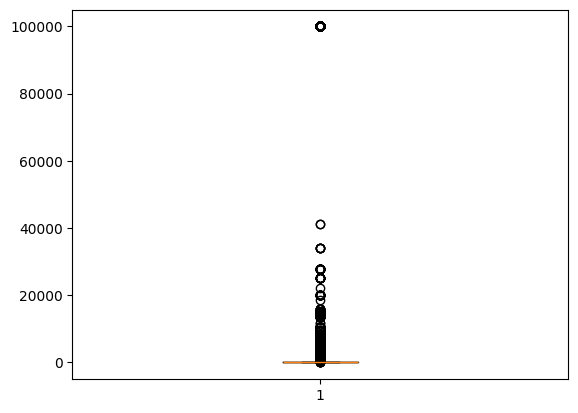

In [25]:
plt.boxplot(data['capital-gain'])
plt.show()

In [27]:
print(data.columns.tolist())


['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']


In [30]:
data['education-num']  # ← if that's the actual column name


,education-num
0,13
1,13
2,9
3,7
4,13
...,...
32556,12
32557,9
32558,9
32559,9


In [31]:
data=data[(data['education-num']<=16)&(data['education-num']>=5)]

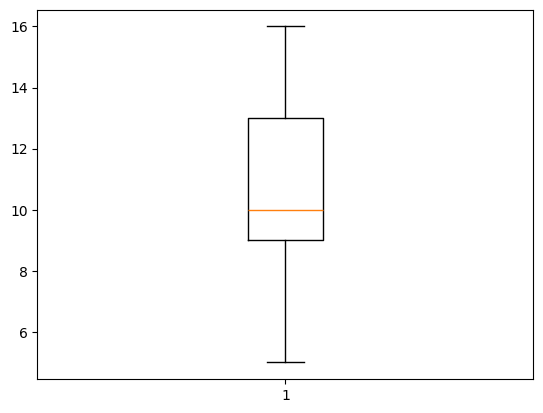

In [ ]:
plt.boxplot(data['educational-num'])
plt.show()

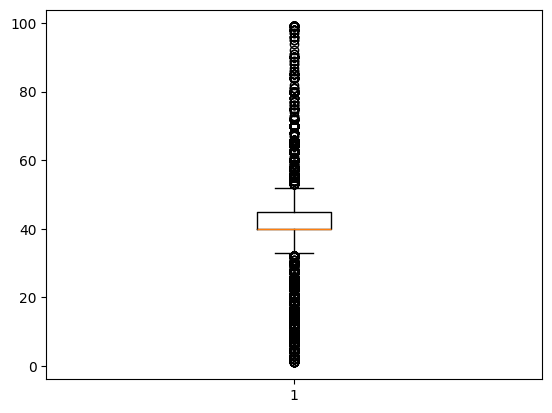

In [32]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [33]:
data.shape

(31163, 15)

In [34]:
data=data.drop(columns=['education']) #redundant features removal

In [35]:
data

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [36]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
data['workclass']=encoder.fit_transform(data['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
data['marital-status']=encoder.fit_transform(data['marital-status'])   #3 categories 0, 1, 2
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])      #5 categories  0, 1, 2, 3, 4
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])    #2 catogories     0, 1
data['native-country']=encoder.fit_transform(data['native-country'])

In [59]:
data

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,12,2,13,5,4,0,0,0,38,39,<=50K
32557,40,4,154374,9,2,7,0,4,1,0,0,40,39,>50K
32558,58,4,151910,9,6,1,4,4,0,0,0,40,39,<=50K
32559,22,4,201490,9,4,1,3,4,1,0,0,20,39,<=50K


In [60]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression Accuracy: 0.8174
              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.89      4708
        >50K       0.69      0.46      0.55      1525

    accuracy                           0.82      6233
   macro avg       0.77      0.70      0.72      6233
weighted avg       0.81      0.82      0.80      6233

RandomForest Accuracy: 0.8558
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4708
        >50K       0.74      0.63      0.68      1525

    accuracy                           0.86      6233
   macro avg       0.81      0.78      0.79      6233
weighted avg       0.85      0.86      0.85      6233

KNN Accuracy: 0.8267
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89      4708
        >50K       0.66      0.59      0.63      1525

    accuracy                           0.83      6233
   macro avg       0.77      0.75      0.

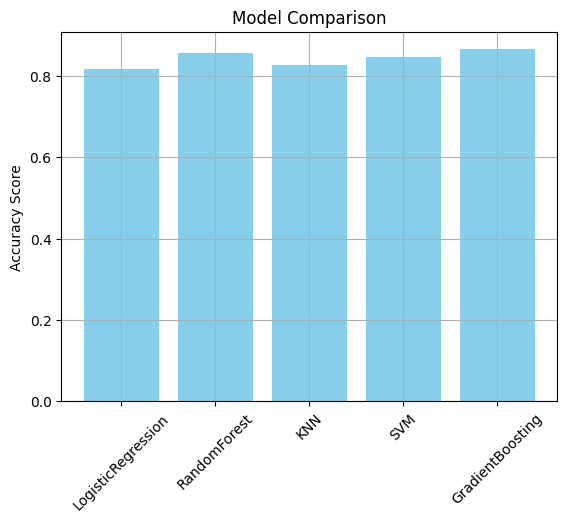

In [61]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.7979
RandomForest: 0.8550
KNN: 0.7778
SVM: 0.7932
GradientBoosting: 0.8643

✅ Best model: GradientBoosting with accuracy 0.8643
✅ Saved best model as best_model.pkl


In [63]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("best_model.pkl")

# Set Streamlit page configuration
st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs for manual prediction
st.sidebar.header("Input Employee Details")

age = st.sidebar.slider("Age", 18, 65, 30)
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# Build input DataFrame
input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

st.write("### 🔎 Input Data")
st.write(input_df)

# Manual prediction
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction section
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    try:
        batch_data = pd.read_csv(uploaded_file)
        # Normalize column names
        batch_data.columns = batch_data.columns.str.strip().str.lower()

        st.write("Uploaded data preview:")
        st.write(batch_data.head())

        # Required columns based on your model
        required_cols = ['age', 'education', 'occupation', 'hours-per-week', 'experience']

        if all(col in batch_data.columns for col in required_cols):
            batch_data = batch_data[required_cols]  # Keep only needed columns
            batch_preds = model.predict(batch_data)
            batch_data['PredictedClass'] = batch_preds
            st.write("✅ Predictions:")
            st.write(batch_data.head())
            csv = batch_data.to_csv(index=False).encode('utf-8')
            st.download_button("📥 Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')
        else:
            missing = [col for col in required_cols if col not in batch_data.columns]
            st.error(f"❌ Missing required columns: {', '.join(missing)}")
    except Exception as e:
        st.error(f"⚠️ Error reading the uploaded file: {e}")


Overwriting app.py


In [67]:
!ngrok config add-authtoken 30GC7kbf03vf96am6pbSDxEK7rl_4scgDFWzUQWKMfyJjDkxT



Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [69]:
from pyngrok import ngrok

ngrok.kill()  # Stop any previous tunnels

# ✅ Correct usage: port as a positional argument
public_url = ngrok.connect(8501)
print("🚀 Streamlit app URL:", public_url)


🚀 Streamlit app URL: NgrokTunnel: "https://aee2c2095ed2.ngrok-free.app" -> "http://localhost:8501"


In [64]:
!pip install streamlit pyngrok

In [65]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.80.177.76:8501

  Stopping...
^C


In [70]:
import os
from pyngrok import ngrok
import time

# Step 1: Write a simple Streamlit app to a file (optional)
with open("app.py", "w") as f:
    f.write('''
import streamlit as st

st.title("🚀 Streamlit App from Colab")
st.write("This Streamlit app is running inside Google Colab using pyngrok and os!")
''')

# Step 2: Kill previous tunnels (if any)
ngrok.kill()

# Step 3: Launch Streamlit app using os.system() in background
os.system("streamlit run app.py &>/content/logs.txt &")

# Step 4: Wait a bit to make sure server has started
time.sleep(5)

# Step 5: Create ngrok tunnel to port 8501
public_url = ngrok.connect(8501)
print("🔗 Streamlit App is Live at:", public_url)


🔗 Streamlit App is Live at: NgrokTunnel: "https://a7dccbf0e692.ngrok-free.app" -> "http://localhost:8501"


In [71]:
!tail -n 20 /content/logs.txt
